<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [1]:
%cd /content/gdrive/MyDrive/Teaching/codes/ocr_27062024/text_recognition

/content/gdrive/MyDrive/Teaching/codes/ocr_27062024/text_recognition



# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
!pip install --upgrade vietocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 31.4 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling 

# Inference

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
import os

In [3]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [4]:
config['weights'] = 'vietocr/weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda'

In [5]:
detector = Predictor(config)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [6]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2024-06-26 14:38:51--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip.4’

sample.zip.4        100%[===================>] 298.80K  --.-KB/s    in 0.005s  

2024-06-26 14:38:51 (53.4 MB/s) - ‘sample.zip.4’ saved [305969/305969]



In [7]:
! ls sample | shuf |head -n 5

30036.jpg
463_Psi_60982.jpg
65010.jpg
6613.jpg
038071004740.jpeg


'these have come at a Cost oF selling land'

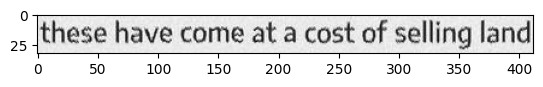

In [8]:
img = 'sample/97652.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [32]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2024-06-26 14:35:45--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  64.8MB/s    in 0.9s    

2024-06-26 14:35:46 (64.8 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [33]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [9]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [10]:
config = Cfg.load_config_from_name('vgg_transformer')

In [11]:
dataset_params = {
    'name':'hw',
    'data_root':'../data/recog_data_3/',
    'train_annotation':'train.txt',
    'valid_annotation':'val.txt'
}

params = {
    'print_every':200,
    'valid_every':5*200,
    'iters':1000,
    'checkpoint':'vietocr/weights/transformerocr.pth',
    'export': 'vietocr/weights/transformerocr_last.pth',
    'metrics': 10000,
    'batch_size': 16
}

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda'

you can change any of these params in this full list below

In [12]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 16,
  'print_every': 200,
  'valid_every': 1000,
  'iters': 1000,
  'export': 'vietocr/weights/transformerocr_last.pth',
  'checkpoint': 'vietocr/weights/transformerocr.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': '../data/recog_data_3/',
  'train_annotation': 'train.txt',
  'valid_annotation': 'val.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 5

In [13]:
trainer = Trainer(config, pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|█████████████████████████████| 16001/16001 [00:00<00:00, 109229.58it/s]

valid_hw exists. Remove folder if you want to create new dataset



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
valid_hw build cluster: 100%|███████████████████████████████| 4001/4001 [00:00<00:00, 133327.59it/s]


You should train model from our pretrained

In [19]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 21484/21484 [00:05<00:00, 3920.69it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|█████████████████████████████████| 4001/4001 [00:02<00:00, 1916.49it/s]


Save model configuration for inference, load_config_from_file

In [20]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

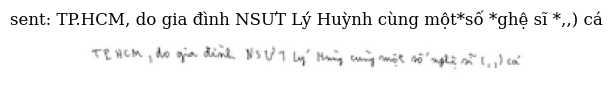

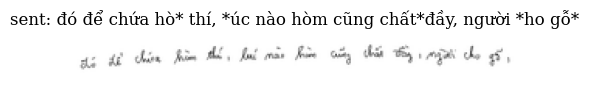

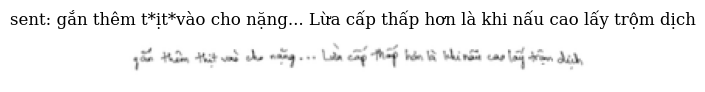

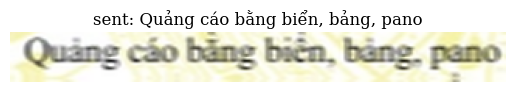

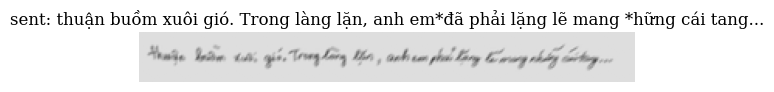

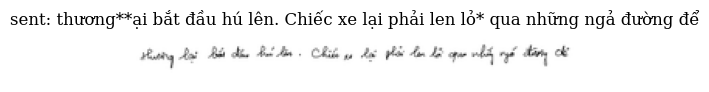

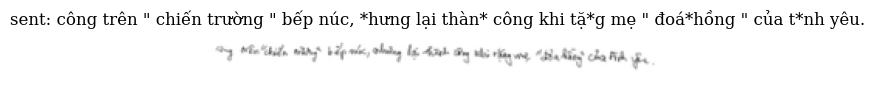

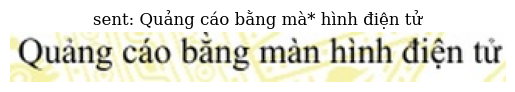

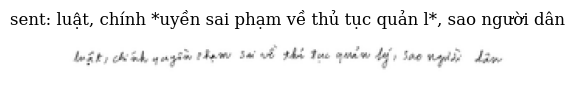

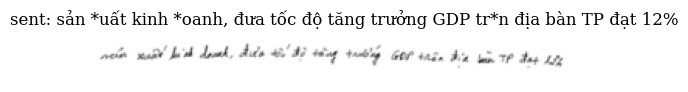

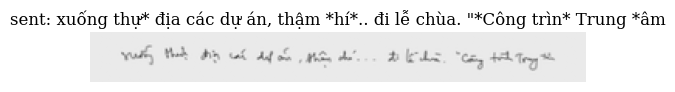

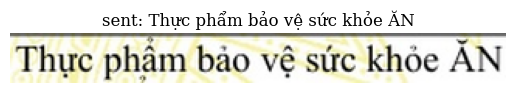

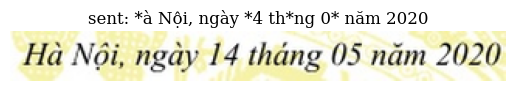

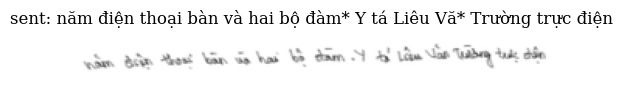

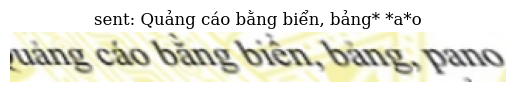

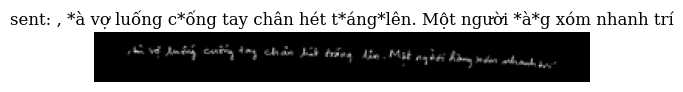

In [21]:
trainer.visualize_dataset()

In [22]:
trainer.train()

iter: 000200 - train loss: 0.957 - lr: 2.91e-04 - load time: 0.44 - gpu time: 52.52
iter: 000400 - train loss: 0.805 - lr: 2.25e-04 - load time: 0.17 - gpu time: 50.79
iter: 000600 - train loss: 0.792 - lr: 1.23e-04 - load time: 0.33 - gpu time: 52.30
iter: 000800 - train loss: 0.760 - lr: 3.48e-05 - load time: 0.24 - gpu time: 50.95
iter: 001000 - train loss: 0.757 - lr: 2.11e-09 - load time: 0.22 - gpu time: 51.23
iter: 001000 - valid loss: 0.679 - acc full seq: 0.8601 - acc per char: 0.9753


Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 0.864 - lr: 2.91e-04 - load time: 0.26 - gpu time: 29.15
iter: 000400 - train loss: 0.769 - lr: 2.25e-04 - load time: 0.04 - gpu time: 27.92
iter: 000600 - train loss: 0.751 - lr: 1.23e-04 - load time: 0.04 - gpu time: 27.86
iter: 000800 - train loss: 0.749 - lr: 3.48e-05 - load time: 0.04 - gpu time: 27.94
iter: 001000 - train loss: 0.744 - lr: 2.11e-09 - load time: 0.53 - gpu time: 27.63
iter: 001000 - valid loss: 0.732 - acc full seq: 0.9247 - acc per char: 0.9829


Visualize prediction from our trained model


In [23]:
trainer.visualize_prediction()

FileNotFoundError: [Errno 2] No such file or directory: '../data/recog_data_3/images/address_test_0_1408.jpg'

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.9247340425531915, 0.9824588)